# Predicción del Happiness Score usando Regresión Lineal.

El [**World Happiness Report**](https://worldhappiness.report/) es una publicación anual que clasifica a los países en función de su nivel de felicidad. Este nivel de felicidad o **Happiness Score** está influenciado por varios factores socioeconómicos y de bienestar, tales como el PIB per cápita, el apoyo social, la esperanza de vida saludable, la libertad para tomar decisiones de vida, la generosidad, la percepción de corrupción y la percepción del estado de ánimo.

En la práctica utilizaremos técnicas de regresión lineal para predecir el *Happiness Score* a partir de los factores mencionados, usando el conjunto de datos. 

### Objetivos de la práctica:


* Análisis Exploratorio de Datos (EDA): Entender la estructura del conjunto de datos, visualizar las relaciones entre variables y determinar las correlaciones.
* Implementar Regresión Lineal: Entrenar un modelo de regresión lineal para predecir el *Happiness Score* usando los factores disponibles en el conjunto de datos.
    *  Regularización: Explorar si la regularización (Ridge y Lasso) es útil en este caso.
    *  Escalado de Variables: Determinar si es necesario escalar las variables antes de ajustar los modelos.
* Evaluación del Modelo: Comparar las métricas de rendimiento del modelo (RMSE, R²) en distintos escenarios (con y sin regularización, con y sin escalado).


### Archivo de datos.

El fichero `happiness.csv` contiene en formato *csv* el conjunto de datos que utilizaremos en la práctica. Asegúrate de que contiene las siguientes columnas:

* `Country`: Nombre del país.
* `year`: Para cada país los años en los que hay registros.
* `Life Ladder`: o Happiness Score: Índice de felicidad (variable objetivo a predecir).
* `Log GDP per capita`:  PIB per cápita en escala logarítmica.
* `Social Support`: Apoyo social percibido. Es la media nacional a la pregunta Si o no (1/0) "Si tuvieses problemas ¿Tienes familia o amigos con los que contar si los necesitas?"
* `Healthy Life Expectancy`: Esperanza de vida saludable
* `Freedom to Make Life Choices`: Libertad para tomar decisiones sobre la vi De nuevo media nacional a la pregunta Si o no (1/0) "¿Estás satisfecho con la libertad que tienes para elegir lo que quieres en tu vida?"
* `Generosity`: Generosidad de la población. Promedio nacional de las respuestas a la pregunta "¿Ha donado dinero a una organización benéfica en el último mes? Se calcula eliminando el efecto del PIB per cápita, ajustando las donaciones a lo que se esperaría dado el nivel de riqueza del país (PIB per cápita). El residual representa cuánto más (o menos) dona una nación, en comparación con lo que predeciría el PIB per cápita.
* `Perception of Corruption`: Percepción de la corrupción La medida es el promedio nacional de las respuestas a dos preguntas de la encuesta: "¿Está la corrupción generalizada en el gobierno o no?" y "¿Está la corrupción generalizada en las empresas o no?". La percepción general es simplemente el promedio de las dos respuestas, que son 0 o 1.
  
* `Positive affect`: Es el promedio de tres medidas de afecto positivo en la encuesta: risa, disfrute y realización de actividades interesantes. Se calcula a partir de las respuestas a preguntas como "¿Reíste o sonreíste mucho ayer?", "¿Experimentaste disfrute durante gran parte del día?", y "¿Aprendiste o hiciste algo interesante ayer?". De nuevo media entre 0 y 1.
  
* `Negative affect`: Es el promedio de tres medidas de afecto negativo: preocupación, tristeza y enfado, obtenidas a partir de preguntas como "¿Te sentiste preocupado durante gran parte del día?", "¿Te sentiste triste durante gran parte del día?", y "¿Te sentiste enfadado durante gran parte del día?". De nuevo media entre 0 y 1.



## Predicción del *Happiness Score* 2023.

Vamos a empezar tomando solamente los datos correspondientes al año 2023. Lo primero que haremos será limitar el análisis a aquellos países para los que hay información en ese año.

Con esos datos haremos lo siguiente:

[Paso 1: Análisis Exploratorio de Datos (EDA)](#Paso1)

[Paso 2: Regresión Lineal](#Paso2)

[Paso 3: Escalado de las Variables](#Paso3)

[Paso 4: Regularización (Ridge y Lasso)](#Paso4)

[Paso 5: Comparación Final](#Paso5)

<a id="Paso1"></a>
## Paso 1: Análisis Exploratorio de Datos (EDA)

* Carga el conjunto de datos y describe las características principales del mismo.
* Visualiza las distribuciones de las variables numéricas usando histogramas.
* Calcula la matriz de correlación y visualízala con un mapa de calor. Identifica las variables que están más correlacionadas con el Happiness Score.
* Realiza gráficos de dispersión (scatterplot) para estudiar las relaciones entre el *Happiness Score* y cada uno de los factores.

In [193]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
import sklearn
assert sklearn.__version__ >= "0.20"

happy_2023 = pd.read_csv('..\Archivos\happiness.csv', sep=';', decimal=',', encoding='ISO-8859-1')

In [194]:
happy_2023.shape
happy_2023.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


In [195]:
happy_2023.info() # todos son float menos el año que es un int y el country name que es un object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


In [196]:
#print(happy_2023['Country name'].unique())
#happy_2023['Country name'].value_counts(normalize=True)

In [197]:
columnas_numericas = happy_2023.columns[happy_2023.dtypes != object]
happy_2023[columnas_numericas].describe()
happy_2023=happy_2023.drop("Country name",axis=1)

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'Life Ladder'}>,
        <Axes: title={'center': 'Log GDP per capita'}>],
       [<Axes: title={'center': 'Social support'}>,
        <Axes: title={'center': 'Healthy life expectancy at birth'}>,
        <Axes: title={'center': 'Freedom to make life choices'}>],
       [<Axes: title={'center': 'Generosity'}>,
        <Axes: title={'center': 'Perceptions of corruption'}>,
        <Axes: title={'center': 'Positive affect'}>],
       [<Axes: title={'center': 'Negative affect'}>, <Axes: >, <Axes: >]],
      dtype=object)

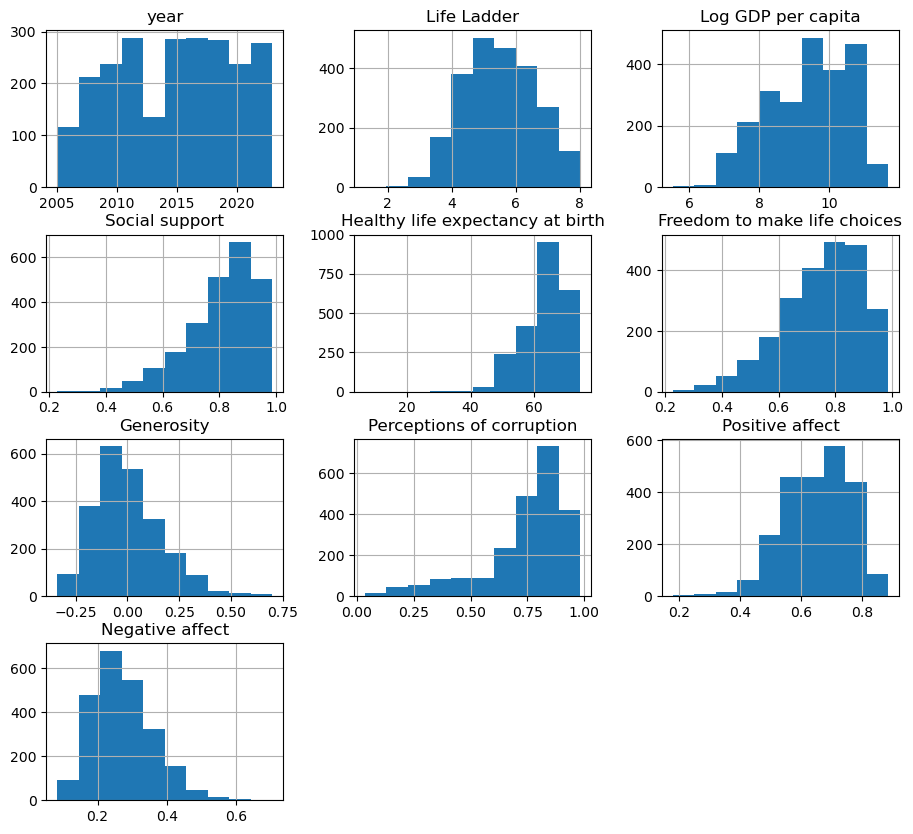

In [198]:
happy_2023[columnas_numericas].hist(bins=10, figsize=(11, 10))

<Axes: >

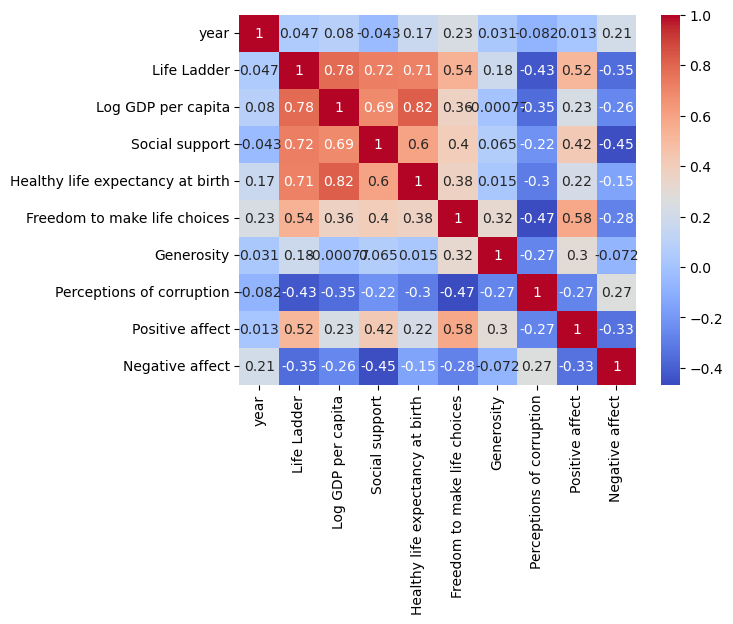

In [199]:
sns.heatmap(happy_2023[columnas_numericas].corr(), annot=True, cmap="coolwarm")

(1.0, 9.0, 0.0, 15.0)

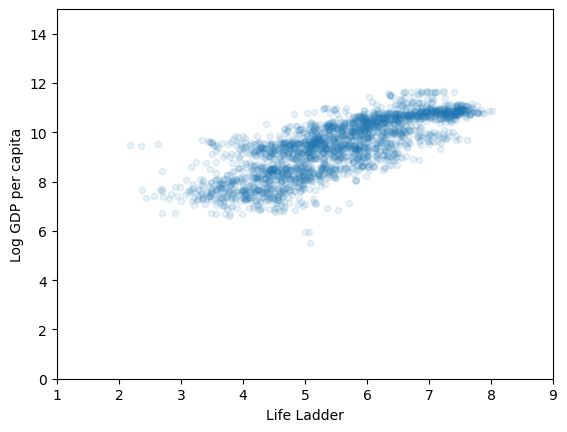

In [200]:
happy_2023.plot(kind="scatter", x="Life Ladder", y="Log GDP per capita",
             alpha=0.1)
plt.axis([1, 9, 0, 15])

(1.0, 9.0, 0.0, 100.0)

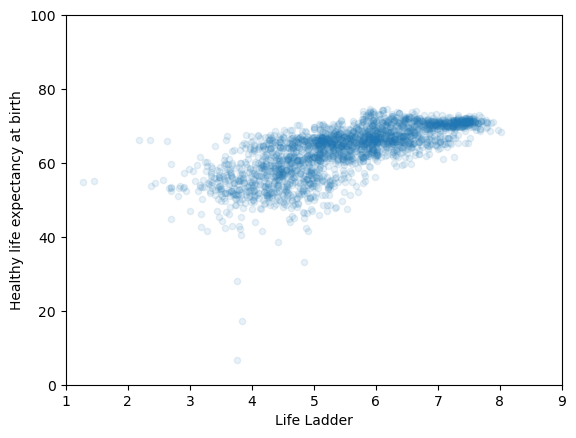

In [201]:
happy_2023.plot(kind="scatter", x="Life Ladder", y="Healthy life expectancy at birth",
             alpha=0.1)
plt.axis([1, 9, 0, 100])

<a id="Paso2"></a>
## Paso 2: Regresión Lineal

* Define el **Happiness Score** como la variable dependiente y las demás columnas como variables independientes.
* Ajusta un modelo de Regresión Lineal con el conjunto de datos sin realizar ninguna modificación (sin escalado ni regularización).
* Usa *train_test_split* para dividir los datos en conjuntos de entrenamiento y test.
* Calcula y muestra las métricas de rendimiento, como el RMSE (*Root Mean Squared Error*) y el R² en el conjunto de test.

In [202]:
def normal_equation(X,y):
    """
    X: el conjunto de datos de entrada en la matriz X(m,n)
        m: número de datos. 
        n: número de variables predictoras o atributos.
    y: Vector con las imagenes de los datos de entrada conocidas. 

    Resuelvo la ecuación normal (X^T)X Theta = (X^T)Y
    Return Theta: vector de coeficientes de la regresión lineal
    """
    n_samples, n_features = X.shape

    # El primer paso será añadir la columna de 1's a los datos
    # Puedes usar la funcion de numpy np.column_stack((v,M)) que añade v como columna de M a la izquierda
    v = np.ones((X.shape[0],1))
    #***** TU CODIGO AQUI ********* (1 línea)
    X_1 = np.column_stack((v,X))
    #***** TU CODIGO AQUI *********

    # Construye la matriz (X^T)X y el vector (X^T)Y donde X es la matriz amplida con la columna de 1's

    #***** TU CODIGO AQUI ********* (2 líneas)
    A = X_1.T@X_1
    B = X_1.T@y
    #***** TU CODIGO AQUI *********

    # Resuelve el sistema lineal (X^T)X Theta = (X^T)Y usando la función adecuada de numpy

    #***** TU CODIGO AQUI ********* (1 línea)
    Theta =  np.linalg.inv(A)@B
    #***** TU CODIGO AQUI *********  
     
    return Theta

def predicted(X, Theta): # le pasa el conjunto de datos de entrada, vector theta calculado en normal ecuation y devuelve las predicciones
    """
    X: el conjunto de datos de entrada en la matriz X(m,n)
        m: número de datos. 
        n: número de variables predictoras o atributos.
    Theta: vector de coeficientes Theta que devuelve la ecuación normal

    Return Y_hat = X Theta
    """
    n_samples, n_features = X.shape
    # El primer paso será añadir la columna de 1's a los datos
    # Puedes usar la funcion de numpy np.column_stack((v,M)) que añade v como columna de M a la izquierda

    v = np.ones((X.shape[0],1))
    #***** TU CODIGO AQUI ********* (1 línea)
    X_1 = np.column_stack((v,X))
    #***** TU CODIGO AQUI *********

    # Calcula el vector de predicciones asociado a los datos de entrada Y=X Theta siendo X es la matriz amplida con la columna de 1's
    
    #***** TU CODIGO AQUI ********* (1 línea)
    Y_hat = X_1@Theta
    #***** TU CODIGO AQUI *********
  
    return  Y_hat

In [203]:
# Básicamente lo que se refiere es que hapiness score va a ser la variable que quiero predecir mientras que el resto de columnas serán las que se usan para explicarla
#y_noNaN = happy_2023.dropna(subset=['Life Ladder']) # variable dep
y = happy_2023['Life Ladder']  
X = happy_2023.drop('Life Ladder', axis=1).select_dtypes(include=np.number).to_numpy() # necesita que esté en formato to_numpy por que si no skslearn no lo analiza
print('y shape:', y.shape)
print('X shape:', X.shape, 'columnas:', X.shape[1])
print('Columnas X:', happy_2023.drop('Life Ladder', axis=1).select_dtypes(include=np.number).columns.tolist())


y shape: (2363,)
X shape: (2363, 9) columnas: 9
Columnas X: ['year', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Limpieza (como antes)
mask = ~np.isnan(X).any(axis=1)
X_clean = X[mask]
y_clean = y[mask].to_numpy().flatten()

# 2. SPLIT 80% train / 20% test (estándar)
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42  # 42=repetición
)

print(f"Train: {X_train.shape[0]} filas")
print(f"Test:  {X_test.shape[0]} filas")

# 3. Entrena theta SOLO con TRAIN
reg = LinearRegression()
reg.fit(X_train, y_train)  # ← Theta de TRAIN

# 4. Extrae theta (misma fórmula)
theta_train = np.insert(reg.coef_, 0, reg.intercept_)
print("Theta (entrenamiento):", theta_train.flatten()) # según el valor de theta, implica si impacta más o menos positiva o negativamente

# 5. Predicciones y evaluación
y_pred_train = reg.predict(X_train)
y_pred_test  = reg.predict(X_test)  # ← Predice TEST con theta de TRAIN

print("\nTRAIN:", f"MSE={mean_squared_error(y_train, y_pred_train):.4f}, R²={r2_score(y_train, y_pred_train):.4f}")
print("TEST: ", f"MSE={mean_squared_error(y_test, y_pred_test):.4f}, R²={r2_score(y_test, y_pred_test):.4f}")



Train: 1677 filas
Test:  420 filas
Theta (entrenamiento): [ 1.25896983e+01 -7.71674693e-03  3.70414562e-01  1.94830315e+00
  3.02336601e-02  5.88967074e-01  2.35116480e-01 -7.28002230e-01
  2.32109712e+00  2.10574672e-01]

TRAIN: MSE=0.2788, R²=0.7889
TEST:  MSE=0.3113, R²=0.7356


<function matplotlib.pyplot.show(close=None, block=None)>

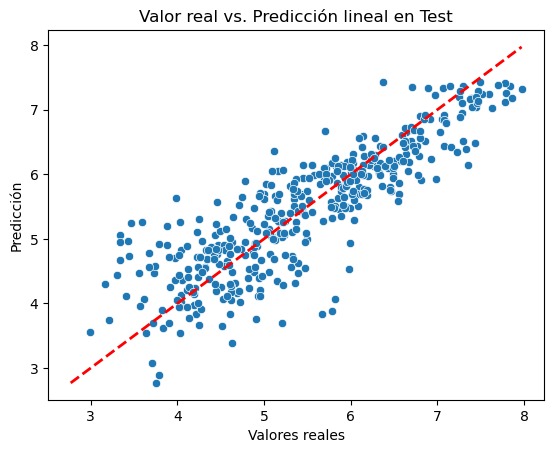

In [205]:
sns.scatterplot(x=y_test,y=y_pred_test)
min_val = min(y_test.min(), y_pred_test.min())  # Valor mínimo para la diagonal
max_val = max(y_test.max(), y_pred_test.max())  # Valor máximo para la diagonal
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label="Línea ideal (y=x)")
plt.xlabel('Valores reales')
plt.ylabel('Predicción')
plt.title('Valor real vs. Predicción lineal en Test')
plt.show

<a id="Paso3"></a>
## Paso 3: Escalado de las Variables

* Realiza el escalado de las variables independientes usando StandardScaler.
* Ajusta un nuevo modelo de regresión lineal con los datos escalados.
* Evalúa el impacto del escalado en el rendimiento del modelo, comparando con los resultados del modelo sin escalar.

<a id="Paso4"></a>
## Paso 4: Regularización (Ridge y Lasso)

* Implementa la Regresión Ridge y Lasso usando las variables escaladas.
* Experimenta con diferentes valores del parámetro de regularización alpha.
* Evalúa los coeficientes del modelo y observa cómo la regularización afecta a las variables menos relevantes (coeficientes cercanos a cero en el caso de Lasso).
* Compara las métricas de rendimiento en el conjunto de prueba con las de la regresión lineal simple.

<a id="Paso5"></a>
## Paso 5: Comparación Final

* Genera una tabla comparativa con las métricas de rendimiento para los siguientes modelos:
   * Regresión lineal sin escalado.
   * Regresión lineal con escalado.
   * Ridge (con escalado).
   * Lasso (con escalado).

* Discute los resultados, centrándote en:
  * ¿Es necesaria la regularización en este caso?
  * ¿Cuál es el impacto de escalar las variables antes de aplicar regularización?
  * ¿Cuál modelo ofrece mejores resultados?